<h1 style="background-color:#ffddad;"> <b>González Lab Workshop 
</h1>

## <i class="fa fa-laptop"></i> How TEs contribute to genomes sequences?
<hr    style="border: 2px solid #86CBBB">

**Date**: 09/07/2025<br>

**Developed by**:
- Dr. Marta Coronado-Zamora (marta.coronado@csic.es)
- Adrián Tarazona Sánchez (atsanchez@ibv.csic.es)
- Dr. Simon Orozco-Arias (simon.orozco@cragenomica.es)

**Supervised by**:
- Dr. Josefa González (josefa.gonzalez@csic.es; http://gonzalezlab.eu)

First edition: January 2023<br>
Last revision: July 2025

We thank Clément Goubert for the [online](https://www.clementgoubert.com/post/a-simple-pipeline-for-te-annotation-in-an-assembled-genome) _Pipeline to annotate transposable elements (TEs) in a genome assembly_ that he developed and shared with the TE community. 
<hr>

<div style="background-color:#f0f0f0;">  
    
##   <i class="fa fa-graduation-cap"></i> Learning outcomes

1. Learn how to perform de novo annotation of transposable elements in a genome assembly using state-of-the-art methodologies: constructing and curating a TE library, annotating TE copies in a genome, and curating the annotations
2. Master all the procedure of the manual curation using MCHelper through the new app TEammo
3. Strengthen the use of bash commands for parsing files and obtaining insight from the data
4. Get familiar with the structure and formats of files used to store genomic data (sequences, TE libraries and annotations)
5. Learn how to visualize genome annotations using the genome browser JBrowse 2 
6. Learn how to associate TE insertions with nearby genes in a genome

</div>

<hr>

# About this practical's support material: Jupyter Notebook

<img style="padding: 0 15px; float: right;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/1200px-Jupyter_logo.svg.png" width = 20%></img>


**Jupyter Notebook** is an interactive development environment that enables the creation of code in Python (and other programming languages) in a dynamic and integrated manner. It combines **code blocks**, **text**, and **images** in a single document, which is a departure from the traditional notion of programming. This approach, known as **literate programming**, prioritizes **readability** and **understandability** by separating code blocks and integrating text and figures. Additionally, it allows for convenient research and sharing of data and results.

We have took all these advantage of Jupyter Notebook to create this practical guide.

### Jupyter Notebook menu
To use the document, there is a set of useful buttons:

<i class="fa fa-save"></i> saves changes made to the document<br>
<i class="fa fa-plus"></i> adds a new cell below the selected one<br>
<i class="fa fa-scissors"></i> cuts the selected cell<br>
<i class="fa fa-copy"></i> copies the selected cell<br>
<i class="fa fa-paste"></i> pastes the cell from the clipboard<br>
<i class="fa fa-play"></i> runs the selected cell. For code cells, the code will be executed, and for Markdown cells, the format will be applied<br>
<i class="fa fa-stop"></i> interrupts the execution of the selected cell<br>
<i class="fa fa-repeat"></i> clears the variables that were saved until that moment<br>
<i class="fa fa-forward"></i> clears the variables that were saved until that moment and runs the entire document from the beginning<br>

<hr>



# 0. Getting ready


## 0.1 Run the `docker` image (from the JupyterLab)

<img style="padding: 0 15px; float: right;" src="https://1000logos.net/wp-content/uploads/2021/11/Docker-Logo-2013.png" width = 20%></img>

In this practical, we will be working within a <code>docker</code>  container. A <code>docker</code>  container is a self-contained executable package of software that includes everything necessary to run applications. All of the programs, libraries, and dependencies required for the practical have been included within the container.

<br>
<div style="background-color:#86CBBB;">  
    <b><i class="fa fa-cogs"></i> To execute the <code>docker</code> container, open a terminal in the <code>practical</code> folder and execute:</b>
</div>
<div style="background-color:#222D32;"><code style="background-color:#222D32;color:#FFF">
  docker run -it --rm -v $(pwd):/work -w /work workshop/curation
  </code>
  
</div>

Now, you'll see that the prompt of the console has changed:

<code style="background-color:#222D32;color:#FFF">(base) (dfam-tetools /work)#:</code><br>

This indicates that we are in the `home` directory with the docker container loaded. You are ready to start the practical!

You can always check in which directory you're located by running `pwd` (*print working directory*):

</div>
<div style="background-color:#222D32; color:#FFF">
    <code style="background-color:#222D32;color:#FFF">(base) (dfam-tetools /work)#: pwd</code>  
    
</div>

</div>
<br>




## 0.2 Prepare the test data (genome subset)

Since using real genomes is time-consuming, we will be using a small region of the *D. melanogaster* genome just to learn how to apply the commands. 

<br>
<div style="background-color:#86CBBB;">  
    <b><i class="fa fa-cogs"></i> To download the genome subset, execute:</b>
</div>
<div style="background-color:#222D32;"><code style="background-color:#222D32;color:#FFF">
  mkdir -p /work/DATA/genome_subset/
  wget https://bioinfohub2.uv.es/d_melanogaster_subset.fa -O /work/DATA/genome_subset/d_melanogaster.fa
  </code>
  
</div>




# 1. Building a *de novo* TE library with RepeatModeler2

**RepeatModeler2** (RM2, [Flynn *et al.* 2020](https://www.pnas.org/doi/10.1073/pnas.1921046117)) is a package for generating  reference libraries of transposable elements (TEs) for any eukaryotic species. RM2 utilizes multiple repeat detection tools to identify and assemble TE families within a genome. The resulting TE library is a multi-fasta file that includes a consensus sequence for each putative TE family.

####  <i class="fa fa-cogs"></i>  1. Specify the name of the species you selected (in the format `p_troglodytes` if we were working with *Pan troglodytes*, for example):

In [1]:
%%bash

sp_name="d_melanogaster"

####  <i class="fa fa-cogs"></i>  2. Build the RM2 database for your genome in a new folder `RepeatModeler2` under the working directory.

In [ ]:
%%bash

mkdir -p /work/practical/RepeatModeler2/${sp_name}
cd /work/practical/RepeatModeler2/${sp_name}

BuildDatabase -name $sp_name /work/DATA/genome_subset/$sp_name.fa

####  <i class="fa fa-cogs"></i>  3. Run RepeatModeler2.

We are using options `-pa 16` to increase the number of CPUs used to 16, and module `-LTRStruct` to improve the results for LTR retrotransposons.

In [ ]:
%%bash

RepeatModeler -database $sp_name -pa 4 -LTRStruct

<div style="background-color:#ffddad;">  
    <i class="fa fa-info-circle"></i> You have to wait between 5 and 20 minutes for RepeatModeler2 to finish. Even with working with a small genome and using 4 CPUs, the program can take a lot of time.
</div>

RM2 will produce a folder named `RM_...` within the directory with temporal files that can be ignored. The important output files are placed in the `RepeatModeler2` folder:

**The outputs of RM2 are**:

- A fasta file (`.fa`) with the consensus sequences <i class="fa fa-thumbs-up"></i>.
- A stk (`.stk`) with the seed alignments. 
- A log file (`.log`) with information on the running process of RM2.


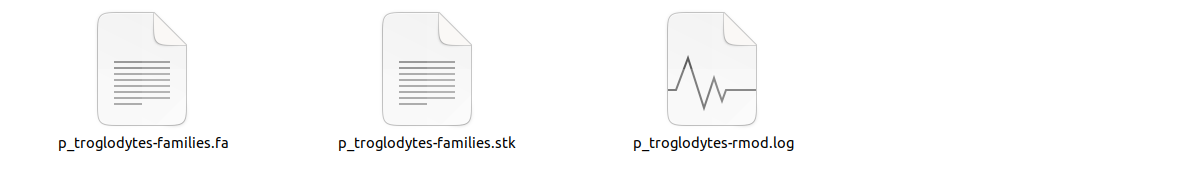

<hr>

# 2a. TE library curation using MCHelper

The curation of TEs is a highly recommended task before continuing any analysis. In the process of curation, three main steps are performed:
1. **Elimination**: the sequences of the RM2 library that do not correspond to TEs will be eliminated
2. **Extension**: the TE sequences will be extended to obtain full-length models 
3. **Redundancy**: redundant TE models of the library will be eliminated

In this case we will use the **MCHelper tool** (https://github.com/GonzalezLab/MCHelper) that allows us to do the process automatically.

####  <i class="fa fa-cogs"></i>  1. Activate the `conda` environment `MCHelper`.

In [1]:
%%bash

source activate MCHelper

####  <i class="fa fa-cogs"></i>  2. Run MCHelper.

The parameters are:

- `-r`: module of curation: `A` for all three modules (Classified, Extension and Unclassified)
- `-a`: level of automation: `F` for fully-automated curation
- `--input_type`: format of the library (fasta)
- `-l`: path to the library (RM2 output)
- `-g`: path to the genome
- `-b`: reference/BUSCO genes to filter out TEs
- `-o`: name of the output directory
- `-c`: minimum number of full-length copies to process an element
- `-t`: threads
- `-x`: number of iterations to extend the elements

<div style="background-color:#ffddad;">  
    <i class="fa fa-info-circle"></i> The <code>-x</code> parameter depends on the species and the TE order.
</div>

We are going to use the subset of the genome and the library produced by RM2. You need to specify the BUSCO filename (check the table to see the one corresponding to your species).

In [ ]:
%%bash

mkdir -p /work/practical/MCHelper/${sp_name}
cd /work/practical/MCHelper/${sp_name}

BUSCO="diptera_odb12_ALL.hmm" # Specify the BUSCO filename

python /opt/MCHelper/MCHelper.py \
-r A  \
-a F \
--input_type fasta  \
-l /work/practical/RepeatModeler2/${sp_name}/${sp_name}-families.fa  \
-g /work/DATA/genome_subset/${sp_name}.fa \
-b /work/teammo_data/BUSCO_libs/$BUSCO  \
-o /work/practical/MCHelper/${sp_name} \
-c 1 \
-t 4

<div style="background-color:#ffddad;">  
    <i class="fa fa-info-circle"></i> You have to wait between 5 and 20 minutes for MCHelper to finish.
</div>

MCHelper will produce three folders resulting from running the three steps of the curation process. The important file is the one named `curated_sequences_NR.fa`, which contains a non-redundant library of the automatically curated sequences.

# 2b. TE library curation using MCHelper with TEammo 

<img style="padding: 0 15px; float: right;" src="https://1000logos.net/wp-content/uploads/2021/11/Docker-Logo-2013.png" width = 20%></img>

As a graphic alternative of running RepeatModeler2 and MCHelper, we are going to use TEammo. Run the docker image of TEammo to start the `shiny` application. Check in the presentation your assigned port.

<br>
<div style="background-color:#86CBBB;">  
    <b><i class="fa fa-cogs"></i> To execute the <code>docker</code> container of TEammo, execute:</b>
</div>
<div style="background-color:#222D32;"><code style="background-color:#222D32;color:#FFF">
    port="" # number
    docker run -p $port:3002 -v $HOME/teammo_data:/data teammo
  </code>
  
</div>

Next, open in the browser: http://bioinfohub2.uv.es:port, for example http://bioinfohub2.uv.es:8097 if port=8097

<hr>

# 3. Annotate the genome using RepeatMasker and the reference TE library

We are going to use **RepeatMasker** ([Smit *et al.* 2013–2015](https://www.repeatmasker.org)), an homology-based method, to identify and quantify TE insertions in the genome of our species using the standard TE library. 

####  <i class="fa fa-cogs"></i>  1. Run `RepeatMasker`. 

These are the arguments:

- `-pa`: number of CPU
- `-a`: shows the alignments in a .align output file 
- `-s`: "slow" search mode (recommended)
- `-gff`: produces a gff file
- `-no_is`: don't look for insertion sequences (prokaryotic TE)

<div style="background-color:#ffddad;">  
    <i class="fa fa-info-circle"></i> RepeatMasker can take from minutes to days to complete depending on the genome size and TE content. For larger genomes (such as human genome), it is highly recommended to split RepeatMasker runs per chromosome and take advantage of parallelization when possible.
</div>

In [ ]:
%%bash

mkdir -p /work/practical/RepeatMasker/${sp_name}
# HACE FALTA SUBIR LA CARPETA DATA/REFERENCE TEs!!! O usar una librería curada en el workshop
RepeatMasker -pa 4 -s -a -gff -no_is \
-lib /work/DATA/reference_TE/${sp_name}.transposons.fa \
/work/DATA/genome_subset/${sp_name}.fa \
-dir /work/practical/RepeatMasker/${sp_name}/

The outputs of RepeatMasker are named with the prefix `sp_name.fa.*`:

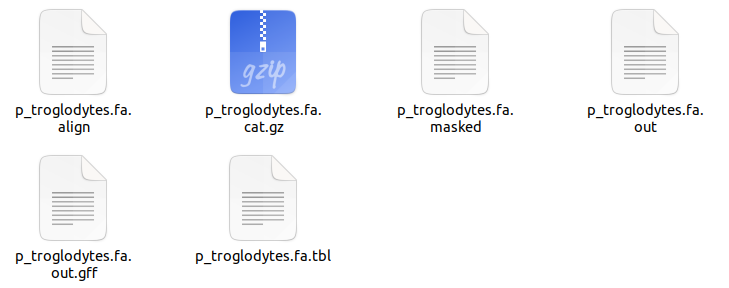

- `sp_name.fa.out`: main RepeatMasker output, this is a table with a 3 lines header. It gives the genomic coordinates of TE hits on the genome.
- `sp_name.fa.out.gff`: gff version of `.out` file
- `sp_name.fa.masked`: masked version of the genome (`.fasta`), with TE residues marked as "X"
- `sp_name.fa.tbl`: summary table; this is an informative file to have a quick estimate of the repeat content. The repeat content is broken down by type of elements.
- `sp_name.fa.align`: alignment file.

<hr>

# 4. Cleaning the RepeatMasker output with `One code to find them all`

The results generated by RepeatMasker require some additional processing before analysis. We will use `One code to find them all` ([Bailly-Bechet *et al.* 2014](https://mobilednajournal.biomedcentral.com/articles/10.1186/1759-8753-5-13)) to refine the results. As previously mentioned, RepeatMasker generates multiple files, and it can be challenging to identify and differentiate between the different copies of TEs present in the genome. `One code to find them all` is a perl tool that parses the RepeatMasker output file and helps to determine the number and positions of TE copies in the genome. It also calculates quantitative information for different families of TEs.


####  <i class="fa fa-cogs"></i>  1. Build the dictionary. 

The first step is to build a dictionary of the correspondences between LTR subparts of LTR retrotransposons and internal subparts.

The parameters are:
- `-rm`: filename of the RepeatMasker output (`.out` file).
- `-unknown`: this argument indicates that the RepeatMasker output file may contain transposons of "Unknown" class/family to handle them accordingly.

In [ ]:
%%bash

perl /work/tools/Onecodetofindthemall/build_dictionary.pl \
--rm /work/practical/RepeatMasker/${sp_name}/${sp_name}.fa.out \
--unknown > /work/practical/RepeatMasker/${sp_name}/dictionary


####  <i class="fa fa-cogs"></i>  2. Run `One code to find them all`. 

Next, we can run `One code to find them all` with the dictionary we just build in the prior step. 

The parameters are:
- `-rm`: filename of the RepeatMasker output (`.out` file).
- `-ltr`: indicates the code to run with the list of internal/LTR pairs indicated in the dictionary.
- `-strict`: activates the 80-80-80 rule (sequences that align with the reference on more than 80 bp, on more than 80% of their respective length, and with more than 80% of identity)
- `-unknown`: this argument indicates that the RepeatMasker output file may contain transposons of "Unknown" class/family to handle them accordingly.


In [ ]:
%%bash

perl /work/tools/Onecodetofindthemall/one_code_to_find_them_all.pl \
--rm /work/practical/RepeatMasker/${sp_name}/${sp_name}.fa.out \
--ltr /work/practical/RepeatMasker/${sp_name}/dictionary \
--strict \
--unknown 

The program will produce the following files:

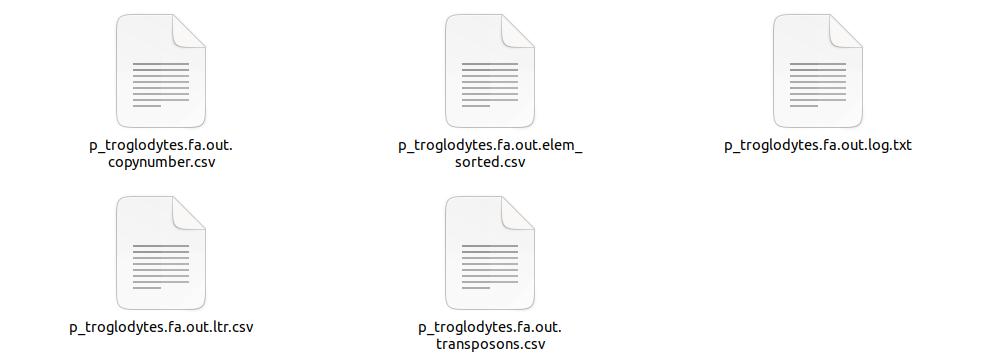

And the following ones are the most interesting:
- `sp_name.fa.transposons.csv` and `sp_name.fa.ltr.csv`:  the copies found, respectively for non-LTR retrotransposons and for LTR retrotransposons 
- `sp_name.fa.elem_sorted.csv`: contains the same information as the two files, but elements are sorted by position and not by family <i class="fa fa-thumbs-up"></i>
- `sp_name.fa.copynumber.csv`: contains a summary of the number of fragments and copies found for each element

<hr>

# 5. Are TE insertions nearby genes?

Now that we know where are the TE insertions located in the genome, we can intersect the TE coordinates with genes of the genome to know if they are inserted nearby or within genes. For that, we can use `bedtools window` ([Quinlan *et al.* 2010](https://academic.oup.com/bioinformatics/article/26/6/841/244688)), that by default will find overlaps 1000 bp upstream and downstream of each feature and `bedtools intersect`, that will find overlaps within the gene:

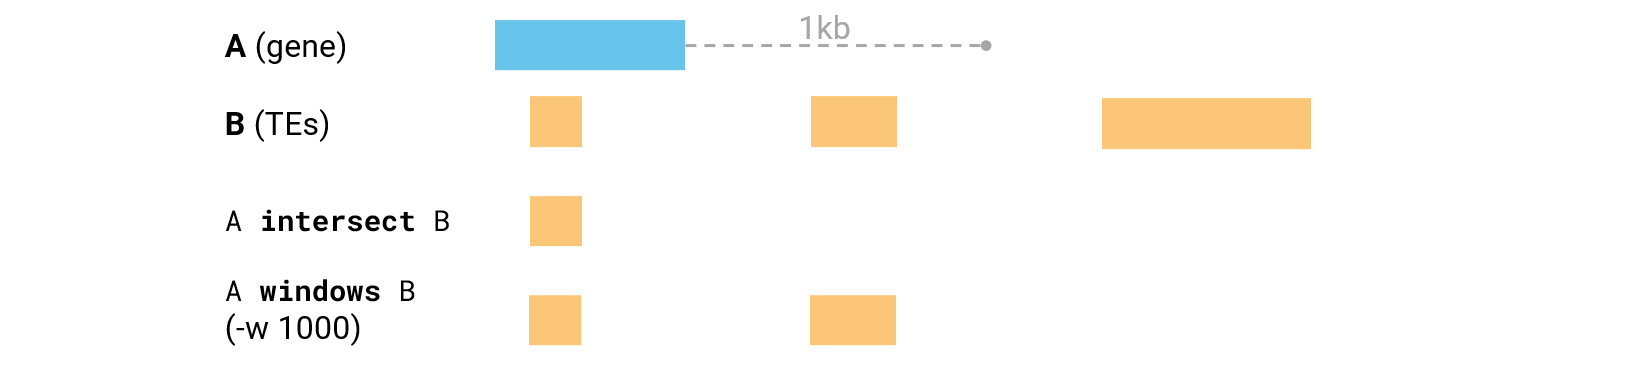

####  <i class="fa fa-cogs"></i> Run `bedtools`. 


In [ ]:
%%bash

source activate MCHelper

#  Bedtools window
bedtools window -a /work/DATA/genes/${sp_name}.gff.gz -b /work/practical/RepeatMasker/${sp_name}/${sp_name}.element_sorted.gff \
 > /work/practical/RepeatMasker/${sp_name}/${sp_name}.window.gff

#  Bedtools intersect
bedtools intersect -a /work/DATA/genes/${sp_name}.gff.gz -b /work/practical/RepeatMasker/${sp_name}/${sp_name}.element_sorted.gff \
 > /work/practical/RepeatMasker/${sp_name}/${sp_name}.intersect.gff

<hr>

# 6. Visualize the results in a genome browser


For creating a genome browser we are going to use the JBrowse 2 platform ([Diesh *et al.* 2022](https://www.biorxiv.org/content/10.1101/2022.07.28.501447v1)). It will allow us to visualize the genome, together with the gene annotations and TE annotations that have been produced in this practical.

To install JBrowse 2 we run the following commands:


In [ ]:
%%bash

source activate browser

npm install -g @jbrowse/cli

jbrowse create /work/practical/jbrowse2

npx serve  /work/practical/jbrowse2

####  <i class="fa fa-cogs"></i>  1. Loading the fasta file. 
To use the genome, we need first to create an index with `samtools`:

In [ ]:
%%bash

samtools faidx /work/DATA/genome_full/${sp_name}.fa.gz

And next, add the assembly the it to the browse installation using the `add-assembly` function:

In [ ]:
%%bash

jbrowse add-assembly /work/DATA/genome_full/${sp_name}.fa.gz \
--load copy --name "${sp_name}" --displayName "${sp_name}" --out /work/practical/jbrowse2

####  <i class="fa fa-cogs"></i>  2. Loading annotations: TE and genes.

You can add tracks with the following syntax:

`jbrowse add-track filename.gff.gz --load copy --out /work/practical/jbrowse2
--assemblyNames "${sp_name}" --name "name" --category "name"`

You can run the code twice, one for adding the TE annotation (`.element_sorted.gff`) and another for the gene annotation (`.gff.gz`).

<br>

In [ ]:
%%bash


####  <i class="fa fa-cogs"></i>  3. Index the ID names to allow browing by gene and TE names

You can index the ID names with the following command:

`jbrowse text-index --attributes=gene_id,gene_symbol,Name,ID --exclude=mRNA,CDS,exon,five_prime_UTR,three_prime_UTR --force 
`

This will allow to use the search bar to look for gene names. You need to be located within the jbrowse2 folder.

####  <i class="fa fa-cogs"></i>  4. Open JBrowse2 and browse your annotation.

Use the command `npx serve /work/practical/jbrowse2`.

In the window, go to *Start a new session* > *Empty* and launch view of a linear genome view. Click *Open* to show the whole assembly and select the tracks that you have provided.


<div style="background-color:#ffddad;">  
    <i class="fa fa-warning"></i> It is not possible to open the browser session from the JupyterLab. You can compress the jbrowse directory and download it to your local computer, and install <code>Node JS</code> to use the previous command: <a href="https://jbrowse.org/jb2/docs/quickstart_web/">https://jbrowse.org/jb2/docs/quickstart_web/</a>.
</div>

<hr>

# More resources

In this practical, we have implemented the critical steps for the *de novo* identification and annotation of TEs, including (i) the creation of a *de novo* TE library; (ii) its curation; (iii) the annotation of the TEs in a genome; and (iv) initial downstream analysis of the TEs annotated using state-of-the-art tools.

There are more tools to work with TEs that are outside the scope of this practical session, but many of them can be found listed in the **TE Hub** repeat tools web page, in case that you want to learn more: https://tehub.org/en/resources/repeat_tools. This is a reference web page that compiles a list of tools to detect, annotate, simulate, visualize TE and repeat elements, among others. As for September 2024, it compiles more than 600 different tools!

**TE Hub** also offers some tutorials to explore some of this tools more in depth: https://tehub.org/en/Tutorials. 